<a href="https://colab.research.google.com/github/shitizz24/Heuristic-TSP/blob/master/Simple_Hill_Climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
f=open('Input/input2.txt','r')

In [3]:
n = int(f.readline())
xcord = [float(x) for x in f.readline().split(' ')][:n]
ycord = [float(x) for x in f.readline().split(' ')][:n]
print(f'{n}')

20


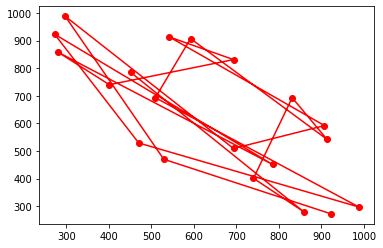

In [4]:
plt.show()
axes = plt.gca()
line, = axes.plot(xcord, ycord,'ro-')

In [5]:
def dist(xcord, ycord, i, j):
  x1 = xcord[i]
  y1 = ycord[i]
  x2 = xcord[j]
  y2 = ycord[j]
  return (math.sqrt((x1-x2)**2 + (y1-y2)**2))

In [6]:
x = [i for i in range(n)]
xcord = [xcord[x[i]] for i in range(n)]
ycord = [ycord[x[i]] for i in range(n)]

initial_cost = sum([dist(xcord, ycord, i, (i+1)%n) for i in range(n)])



In [7]:
def heuristic(xcord, ycord, i, j, current_cost):
  total = current_cost

  if i == 0 and j == n-1:
    i, j = j, i

  if j!=(i+1)%n:
    total -= dist(xcord, ycord, i, (i+1)%n)
    total -= dist(xcord, ycord, j, (j-1+n)%n)
    total += dist(xcord, ycord, j, (i+1)%n)
    total += dist(xcord, ycord, i, (j-1+n)%n)

  total -= dist(xcord, ycord, i, (i-1+n)%n)
  total -= dist(xcord, ycord, j, (j+1)%n)
  total += dist(xcord, ycord, i, (j+1)%n)
  total += dist(xcord, ycord, j, (i-1+n)%n)
  return (total)

In [8]:
def draw(finished, iteration, cost):
  newxcord = xcord.copy() + [xcord[0]]
  newycord = ycord.copy() + [ycord[0]]

  title = "Final " if finished else "iteration no. %d \n" % iteration
  title = title + ("total distance = %.2f \n" % cost)
  plt.title(title, fontsize = 15)

  plt.show()
  axes = plt.gca()
  line, = axes.plot(newxcord, newycord, 'ro-')

In [11]:
def Simple_Hill_Climbing(xcord, ycord, initial_cost, x):
  current_cost = initial_cost


  for t in range(100):

    draw(False, t+1, current_cost)

    # simple_results.append(current_cost)
    print("iteration = ", t+1)
    print("total distance = %.2f" % current_cost)

    newtotal = current_cost
    swapi, swapj = -1, -1
    
    flag=False
    for i in range(n):
      for j in range(n):
        if i != j and i < j:

          neighbour = heuristic(xcord, ycord, i, j, current_cost)

          if neighbour < newtotal:
            newtotal = neighbour
            swapi = i
            swapj = j
            flag=True
            break
      
      if flag==True:
        break

    if newtotal < current_cost:

      x[swapi], x[swapj] = x[swapj], x[swapi]
      xcord[swapi], xcord[swapj] = xcord[swapj], xcord[swapi]
      ycord[swapi], ycord[swapj] = ycord[swapj], ycord[swapi]
      current_cost = newtotal
      print("swapped ", swapi, swapj)
    else:
      # halt 
      print("finish")
      break


  print("Final order = ", x)
  print("Initial cost = ", initial_cost)
  print("Final cost = ", current_cost)
 

  draw(True, 0, current_cost)
  plt.show()

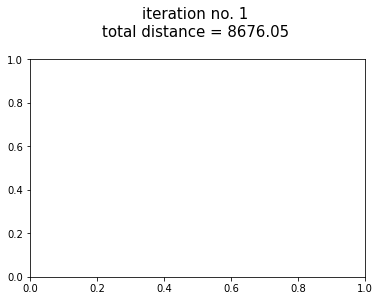

iteration =  1
total distance = 8676.05
swapped  0 2


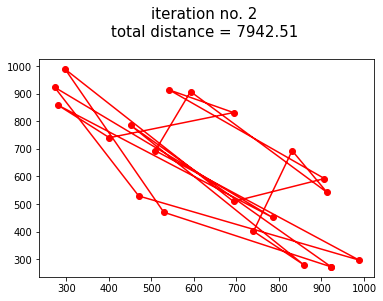

iteration =  2
total distance = 7942.51
swapped  0 6


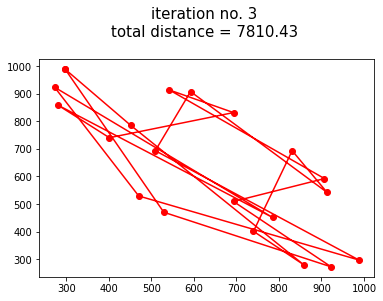

iteration =  3
total distance = 7810.43
swapped  0 5


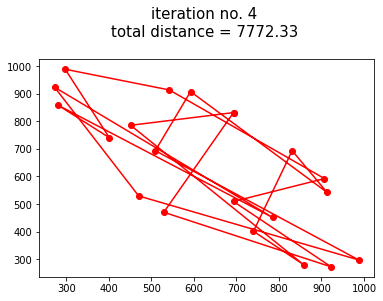

iteration =  4
total distance = 7772.33
swapped  0 6


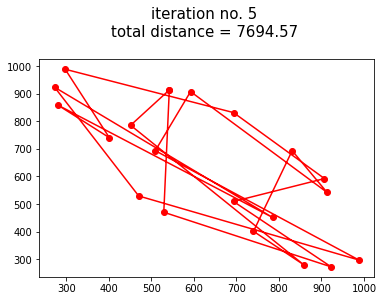

iteration =  5
total distance = 7694.57
swapped  0 7


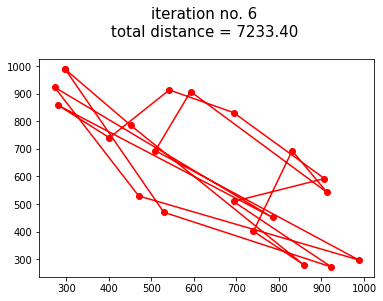

iteration =  6
total distance = 7233.40
swapped  0 9


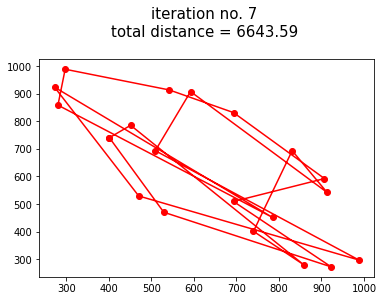

iteration =  7
total distance = 6643.59
swapped  0 1


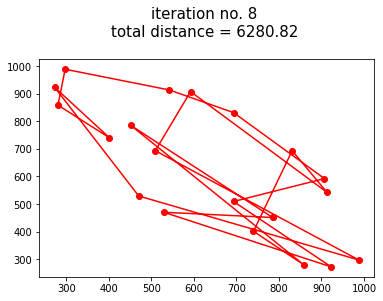

iteration =  8
total distance = 6280.82
swapped  0 12


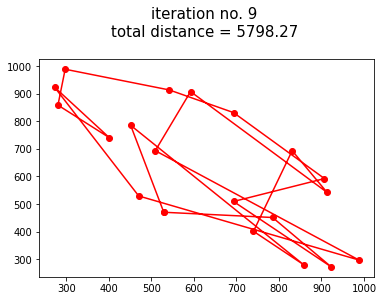

iteration =  9
total distance = 5798.27
swapped  0 1


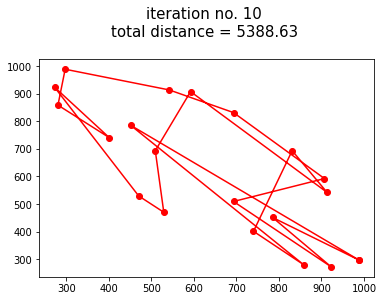

iteration =  10
total distance = 5388.63
swapped  0 3


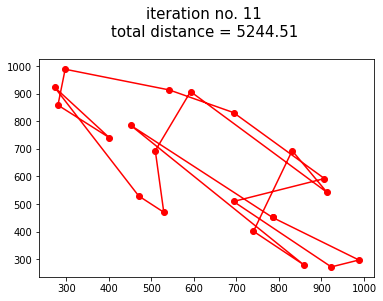

iteration =  11
total distance = 5244.51
swapped  0 4


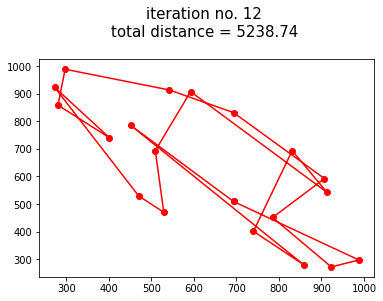

iteration =  12
total distance = 5238.74
swapped  0 14


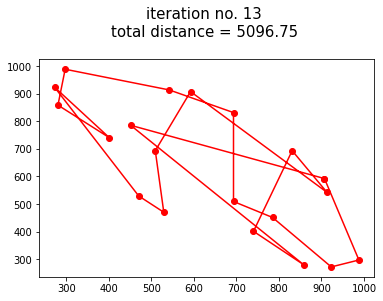

iteration =  13
total distance = 5096.75
swapped  0 5


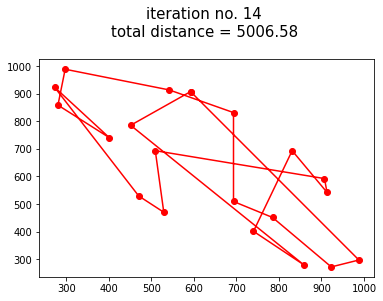

iteration =  14
total distance = 5006.58
swapped  0 4


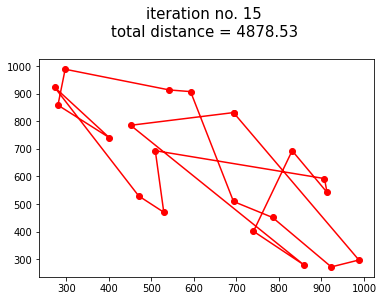

iteration =  15
total distance = 4878.53
swapped  0 13


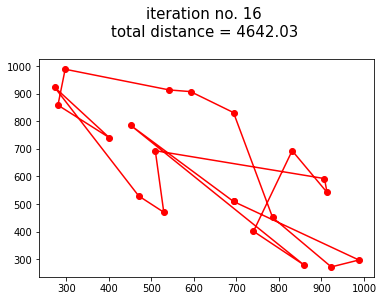

iteration =  16
total distance = 4642.03
swapped  0 18


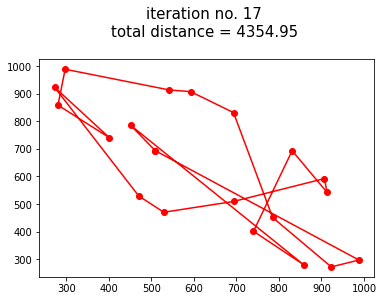

iteration =  17
total distance = 4354.95
swapped  0 3


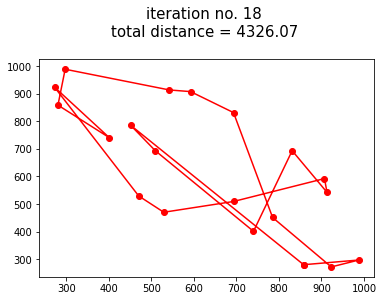

iteration =  18
total distance = 4326.07
swapped  0 16


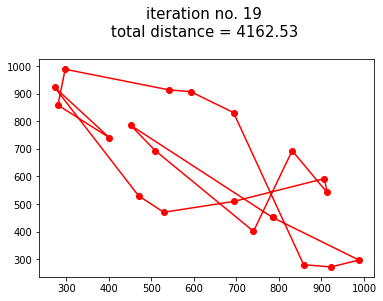

iteration =  19
total distance = 4162.53
swapped  0 3


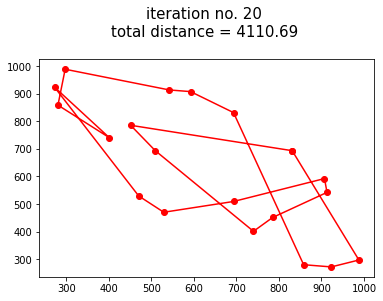

iteration =  20
total distance = 4110.69
swapped  1 2


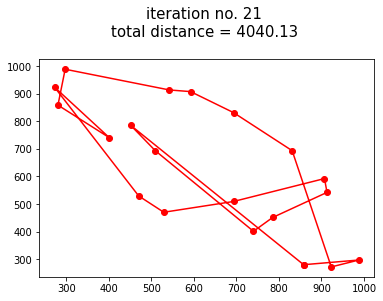

iteration =  21
total distance = 4040.13
swapped  7 9


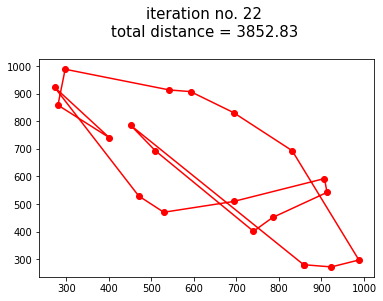

iteration =  22
total distance = 3852.83
swapped  7 10


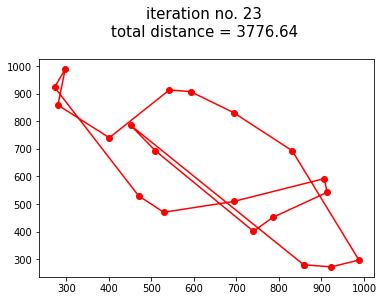

iteration =  23
total distance = 3776.64
swapped  7 8


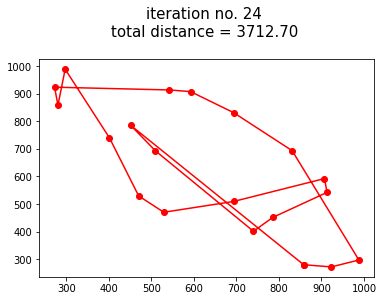

iteration =  24
total distance = 3712.70
swapped  7 9


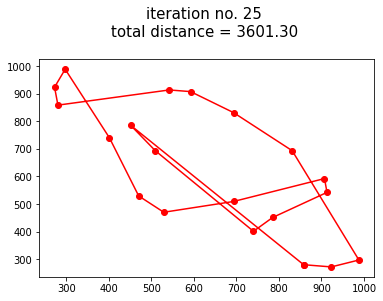

iteration =  25
total distance = 3601.30
swapped  11 19


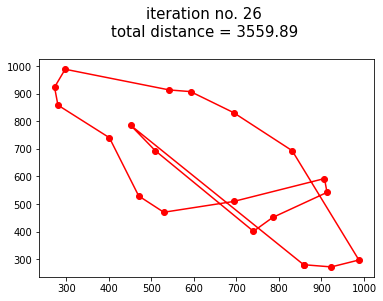

iteration =  26
total distance = 3559.89
swapped  10 11


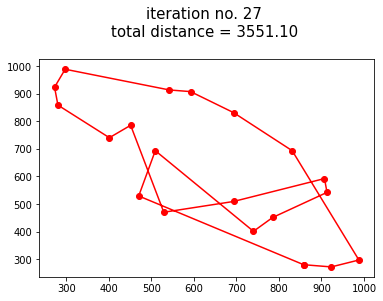

iteration =  27
total distance = 3551.10
swapped  12 18


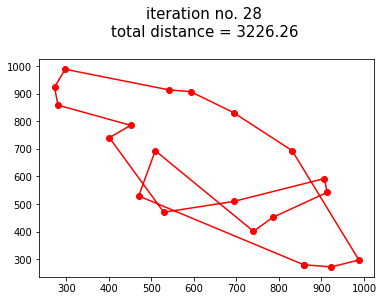

iteration =  28
total distance = 3226.26
swapped  10 11


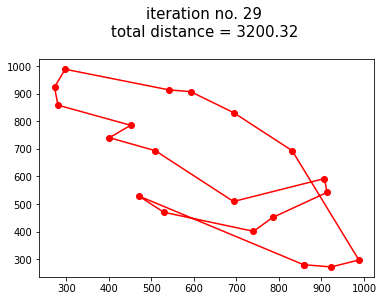

iteration =  29
total distance = 3200.32
swapped  17 19


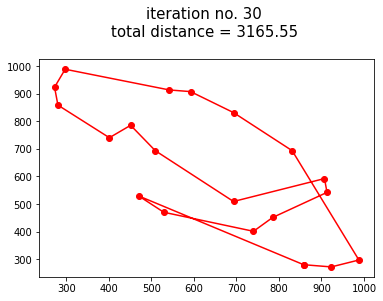

iteration =  30
total distance = 3165.55
swapped  13 17


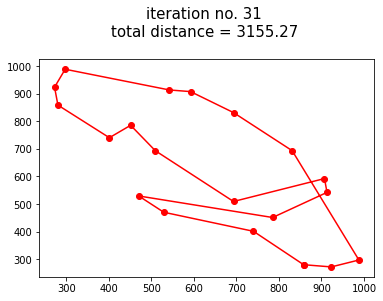

iteration =  31
total distance = 3155.27
finish
Final order =  [18, 0, 12, 16, 6, 14, 5, 2, 10, 8, 7, 19, 13, 11, 4, 15, 9, 3, 1, 17]
Initial cost =  8676.04585485561
Final cost =  3155.2696397243926


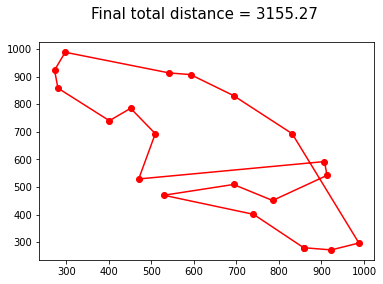

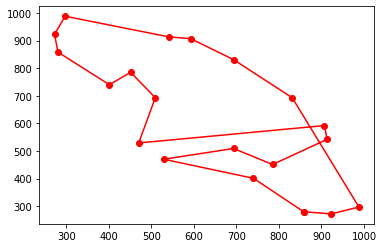

In [12]:
Simple_Hill_Climbing(xcord, ycord, initial_cost, x)